In [15]:
import pandas as pd
import numpy as np
import librosa.display
import librosa
import os
import xlsxwriter
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [4]:
PATH = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Resources/Audios_Euclidean_Distance/'
entries = os.listdir(PATH)

In [19]:
speaker = []
SMMfccs = []

juan = []
gabriel = []
jose = []
leo = []
angelower = []
carlos = []

indexs = []

for file_path in entries:
    file_name_array = file_path.split('_')
    name = file_name_array[0]
    x , sr = librosa.load(PATH+file_path)
    x, index = librosa.effects.trim(x) #  Trim leading and trailing silence from an audio signal.
    x_normalize=sk.preprocessing.minmax_scale(x, axis=0) # Normalizamos
    mfccs = librosa.feature.mfcc(x_normalize, sr=sr,n_mfcc=20,hop_length=int(0.010*sr), n_fft=int(0.025*sr))    
    sum_horizontal = np.sum(mfccs,axis=1)
    sum_vertial = np.sum(sum_horizontal,axis=0)
    SMMfccs.append(sum_vertial)
    indexs.append(file_name_array[1])
    speaker.append(name)      

In [20]:
SMMfccs = np.multiply(SMMfccs,-1)

In [21]:
df = pd.concat([pd.DataFrame(speaker),pd.DataFrame(indexs),pd.DataFrame(SMMfccs)],axis=1)

In [22]:
df

,0,0,0
0,Carlos,2.wav,39675.316406
1,jose,4.wav,40380.925781
2,angelower,2.wav,34207.746094
3,gabriel,3.wav,47785.546875
4,angelower,3.wav,25139.246094
5,Juan,1.wav,49735.078125
6,jose,5.wav,48286.328125
7,Juan,3.wav,57991.179688
8,Leon,5.wav,81847.523438
9,Leon,2.wav,88852.640625


In [23]:
writer = pd.ExcelWriter('sounds_MFCCs_sum_rows_columns.xlsx', engine='xlsxwriter')
df.to_excel(writer,sheet_name='welcome',index=False)
writer.save()

In [5]:
path_mfcc = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/sounds_MFCCs_sum_rows_columns.xlsx'
sheet_name= 'summary'

In [6]:
df_mfcc = pd.read_excel(path_mfcc,sheet_name)

In [7]:
df_mfcc

,Speaker,Sound 1,Sound 2,Sound 3,Sound 4,Sound 5
0,angelower,22848.109375,34207.746094,25139.246094,45629.292969,33152.074219
1,Carlos,25330.357422,39675.316406,40416.453125,62790.941406,39896.695312
2,gabriel,33247.007812,45298.250000,47785.546875,62732.320312,46392.343750
3,jose,23005.394531,41867.929688,50938.714844,40380.925781,48286.328125
4,Juan,49735.078125,62151.750000,57991.179688,68289.226562,46275.507812
5,Leon,60441.804688,88852.640625,67212.679688,86835.570312,81847.523438


## Euclidean distance value

In [17]:
speakers_1 = []
speakers_2 = []
de = []

for i in range(0,6):
    speaker_1 = df_mfcc.iloc[i,0]
    n =  df_mfcc.iloc[i,1:]
    for j in range(0,6):
        m =  df_mfcc.iloc[j,1:]
        speaker_2= df_mfcc.iloc[j,0]
        d =distance.euclidean(n,m)
        speakers_1.append(speaker_1)
        speakers_2.append(speaker_2)
        de.append(d)
df = pd.concat([pd.DataFrame(speakers_1),pd.DataFrame(speakers_2),pd.DataFrame(de)],axis=1)
        
        

In [18]:
df

,0,0,0
0,angelower,angelower,0.000000
1,angelower,Carlos,24687.264449
2,angelower,gabriel,34811.055518
3,angelower,jose,31319.430686
4,angelower,Juan,57172.747734
5,angelower,Leon,101186.601421
6,Carlos,angelower,24687.264449
7,Carlos,Carlos,0.000000
8,Carlos,gabriel,13812.717450
9,Carlos,jose,26334.876802


In [19]:
writer = pd.ExcelWriter('Euclidean_Distance_ALL_SOUNDS.xlsx', engine='xlsxwriter')
df.to_excel(writer,sheet_name='welcome',index=False)
writer.save()

In [20]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=12):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right', fontsize=fontsize)
    plt.ylabel('Acoustic mean value speaker MFCC')
    plt.xlabel('Acoustic mean value speaker MFCC')
    #return fig

In [23]:
path_ed_sounds = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Euclidean_Distance_ALL_SOUNDS.xlsx'

def print_confusion_matrix_by_sound(sheet_name):
    df_ed_sound = pd.read_excel(path_ed_sounds,sheet_name)
    class_names = list(df_ed_sound['Speaker'])
    df_ed_sound = df_ed_sound.iloc[:,1:]
    confusion_matrix = df_ed_sound.values
    print_confusion_matrix(confusion_matrix, class_names)

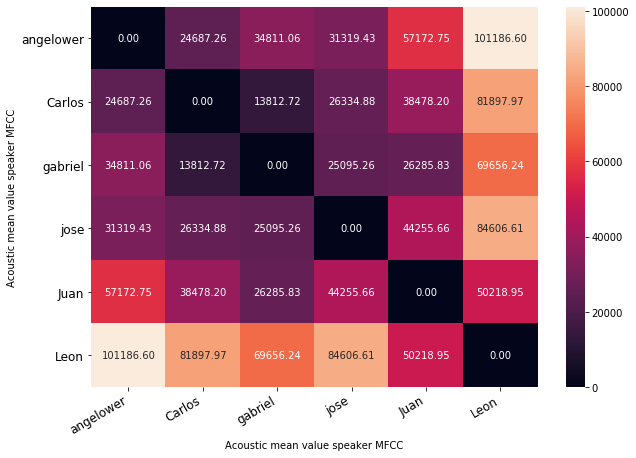

In [24]:
print_confusion_matrix_by_sound('summary')